¡Hola, Hans!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Hans! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

In [123]:
# cargamos todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats as st

In [124]:
# Cargar el archivo de datos en un DataFrame
df = pd.read_csv("/datasets/games.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [125]:
# imprimimos la información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [126]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [127]:
#vamos a ver la informacion a detalle 
df.info
total_rows = len(df)

Reemplaza los nombres de las columnas (ponlos en minúsculas).
Convierte los datos en los tipos necesarios.
Describe las columnas en las que los tipos de datos han sido cambiados

In [128]:
#Cambiar los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()


Se investigan las siguientes columnas pues tienen valores ausentes:name, year_of_release, genre, critic_score, user_Score y rating

In [129]:
#Investigar valores ausentes de columna name
df.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Los valores ausentes en la columna name coinciden con los de la columna genre.

In [130]:
# se eliminan estos dos registro ya que no son significativos 
df = df.query('name.isna() == False')

In [131]:
#Investigar valores ausentes de columna year_of_release
df.query('year_of_release.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [132]:
print('Porcentaje de valores ausentes en "year_of_release":', round(269/total_rows*100,2),'%')

Porcentaje de valores ausentes en "year_of_release": 1.61 %


In [133]:
#Eliminar filas de valores ausentes en la columna year_of_release ya que no son significativas
df = df.query('year_of_release.isna() == False')

In [134]:
#Investigar valores ausentes de columna critic_score
df.query('critic_score.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [135]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [136]:
print('Porcentaje de valores ausentes en "critic_score":', round(8461/total_rows*100,2),'%')

Porcentaje de valores ausentes en "critic_score": 50.62 %


In [137]:
#Asignar el valor NAN a los valores ausentes para continuar el análisis sin errores por tipo de dato
df['critic_score'] = df['critic_score'].fillna(np.nan)

Las filas con valores ausentes en la columna critic_score representan más de la mitad de los datos de esta columna por lo que NO se pueden eliminar y tampoco se tiene suficiente información para establecer un valor representativo sin alterar el análisis.

Se continua asumiendo falta de datos en esta columna.

In [138]:
#Investigar valores ausentes de columna user_score
df.query('user_score.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [139]:
print('Porcentaje de valores ausentes en "user_score":', round(6605/total_rows*100,2),'%')

Porcentaje de valores ausentes en "user_score": 39.52 %


In [140]:
#Asignar el valor NAN a los valores ausentes para continuar el análisis sin errores por tipo de dato
df['user_score'] = df['user_score'].fillna(np.nan)

Las filas con valores ausentes en la columna user_score representan un porcentaje alto por lo que NO se pueden eliminar y
tampoco se tiene suficiente información para establecer un valor representativo sin alterar el análisis.

Se continua asumiendo falta de datos en esta columna.

In [141]:
#Se buscan valores duplicados en la columna rating
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [142]:
#Investigar valores ausentes de columna rating
df.query('rating.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [143]:
#Investigar valores ausentes de columna rating
df.query('rating.isna() == True and year_of_release < 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15692,Empire Deluxe,PC,1992.0,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


La ESRB se fundo en 1994, por lo que es comprensible que haya múltiples juegos lanzados en años anteriores sin esta clasificación.

In [144]:

print('Porcentaje de valores ausentes en "rating":', round(6676/total_rows*100,2),'%')

Porcentaje de valores ausentes en "rating": 39.94 %


Las filas con valores ausentes en la columna rating representan un porcentaje alto por lo que NO se pueden eliminar. A continuación se busca un valor representativo para ellas.

In [145]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Se establecen los valores ausentes de la columna rating como RP, es decir, pendiente de clasificar (Rating Pending)

In [146]:
#Asignar el valor unknown a los valores ausentes
df['rating'] = df['rating'].fillna("RP")

                                                                CORREGIR TIPO DE DATOS

In [147]:
#Cambiar tipo de dato
df.loc[:, 'year_of_release'] = pd.to_datetime(df.loc[:, 'year_of_release'], format = '%Y').dt.year
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP


In [148]:
#Investigar tipo de dato de columna user_score
df['user_score'].value_counts()


tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.3       2
0.5       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [149]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
len(df.query('user_score == "tbd"'))


0

In [150]:

df['user_score'] = df['user_score'].astype('float64')

df["user_score"].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [151]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

                                                 ENRIQUECER LOS DATOS  

Se crea una columna con las ventas totales de cada videojuego.

In [152]:
#Crear columna de ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


Se crea una columna con las ventas totales promedio por año

In [153]:
df['sales_per_year'] = round( df['total_sales'] /  (2017-df['year_of_release'])  ,2)

In [154]:
#Ver cambios
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24,1.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,3.95
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38,1.49


In [155]:
#verificar informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
 12  sales_per_year   16444 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


                                                                 ANALISIS DE DATOS 

Ventas por año de lanzamiento

In [156]:
#Juegos lanzados por año
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

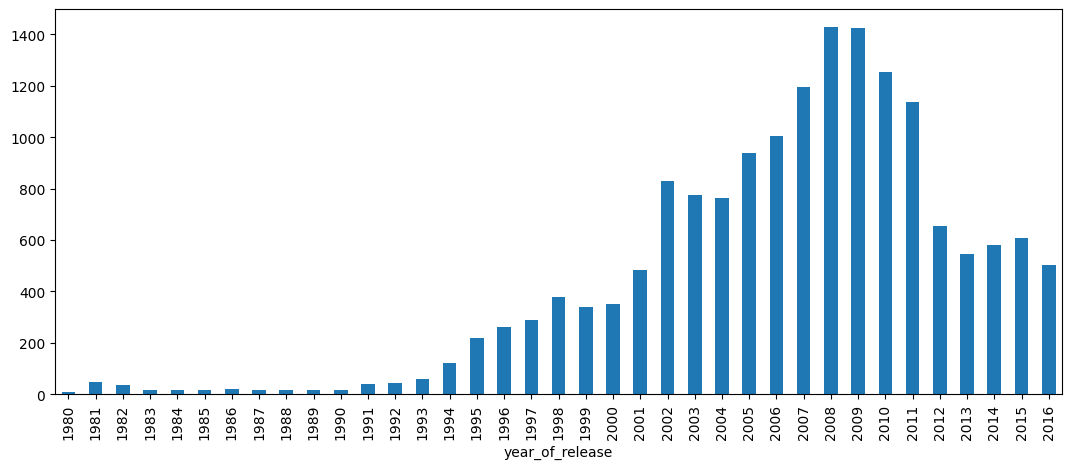

In [157]:
#Juegos lanzados por año
df.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(13,5))
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



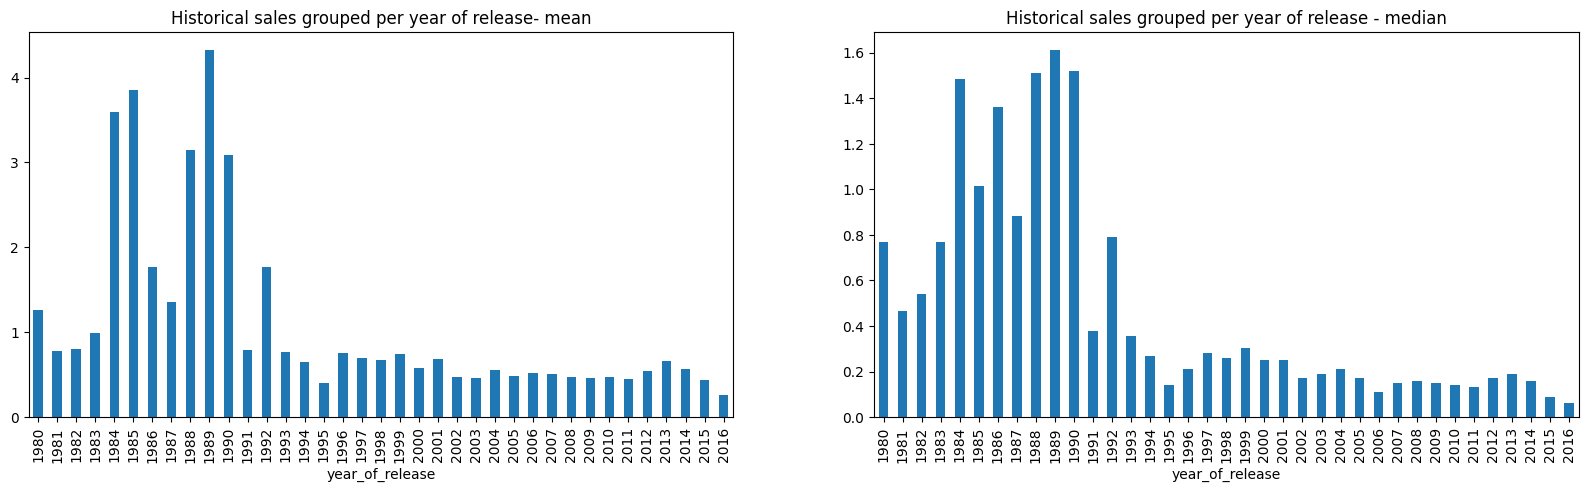

In [158]:
#Ingresos históricos de juegos por año de lanzamiento
plt.subplots(figsize=(20, 5)) 
df.groupby('year_of_release')['total_sales'].mean().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Historical sales grouped per year of release- mean')
df.groupby('year_of_release')['total_sales'].median().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Historical sales grouped per year of release - median')
plt.show()

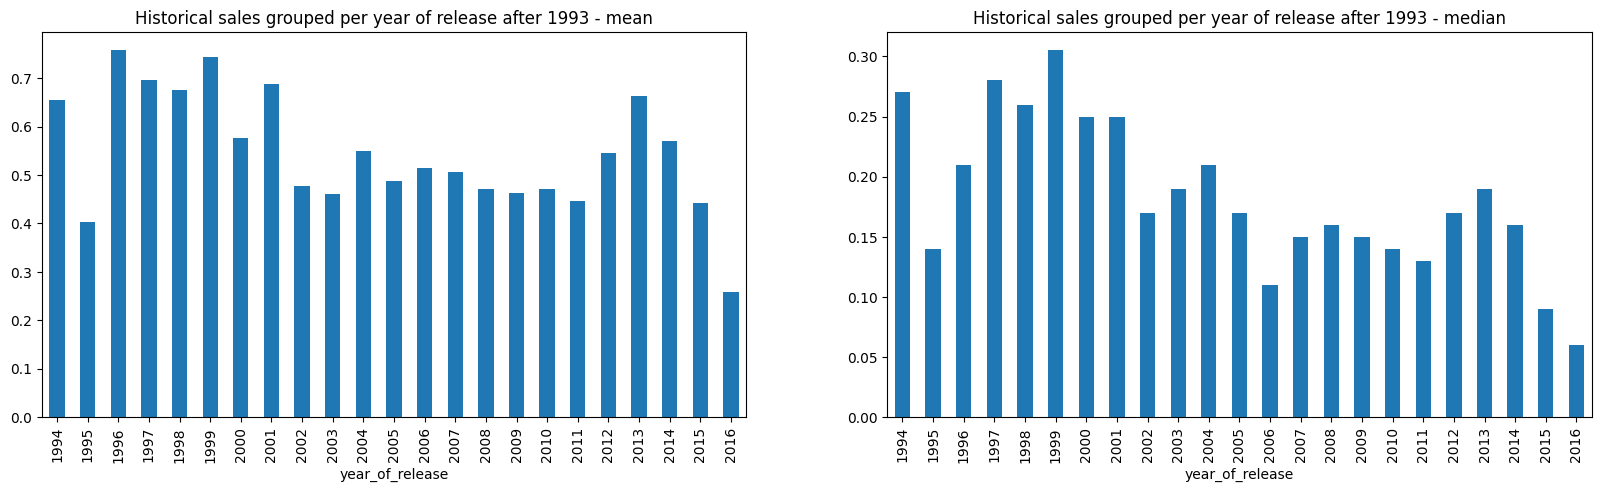

In [159]:
#Ingresos históricos de juegos por año de lanzamiento después de 1993
plt.subplots(figsize=(20, 5)) 
df.query('year_of_release>1993').groupby('year_of_release')['total_sales'].mean().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Historical sales grouped per year of release after 1993 - mean')
df.query('year_of_release>1993').groupby('year_of_release')['total_sales'].median().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Historical sales grouped per year of release after 1993 - median')
plt.show()

In [160]:
df.query('2005<= year_of_release <=2011').groupby('year_of_release')['total_sales'].mean()

year_of_release
2005    0.487561
2006    0.514622
2007    0.505221
2008    0.470568
2009    0.462006
2010    0.470223
2011    0.446813
Name: total_sales, dtype: float64

Antes de 1994, se lanzaban menos de 60 juegos por año, lo que limitaba la oferta disponible para los consumidores. Esta escasa disponibilidad contribuyó a que los ingresos históricos promedio por juego fueran significativamente más altos, alcanzando hasta 4 millones de dólares (MDD) por título.

A partir de 1994, la industria experimentó un aumento constante en la cantidad de juegos lanzados anualmente. Esta mayor oferta provocó una fragmentación del gasto de los consumidores, reduciendo así los ingresos promedio por juego. Desde entonces, los ingresos históricos promedio por título se han mantenido en un rango de entre 0.2 y 0.7 MDD.

Entre 2005 y 2011 —periodo con la mayor cantidad de lanzamientos anuales— los ingresos promedio por juego oscilaron entre 0.44 y 0.51 MDD. Posteriormente, estos promedios comenzaron a incrementarse conforme disminuyó la cantidad de juegos lanzados por año, reflejando nuevamente el impacto que tiene la saturación del mercado en los ingresos individuales.

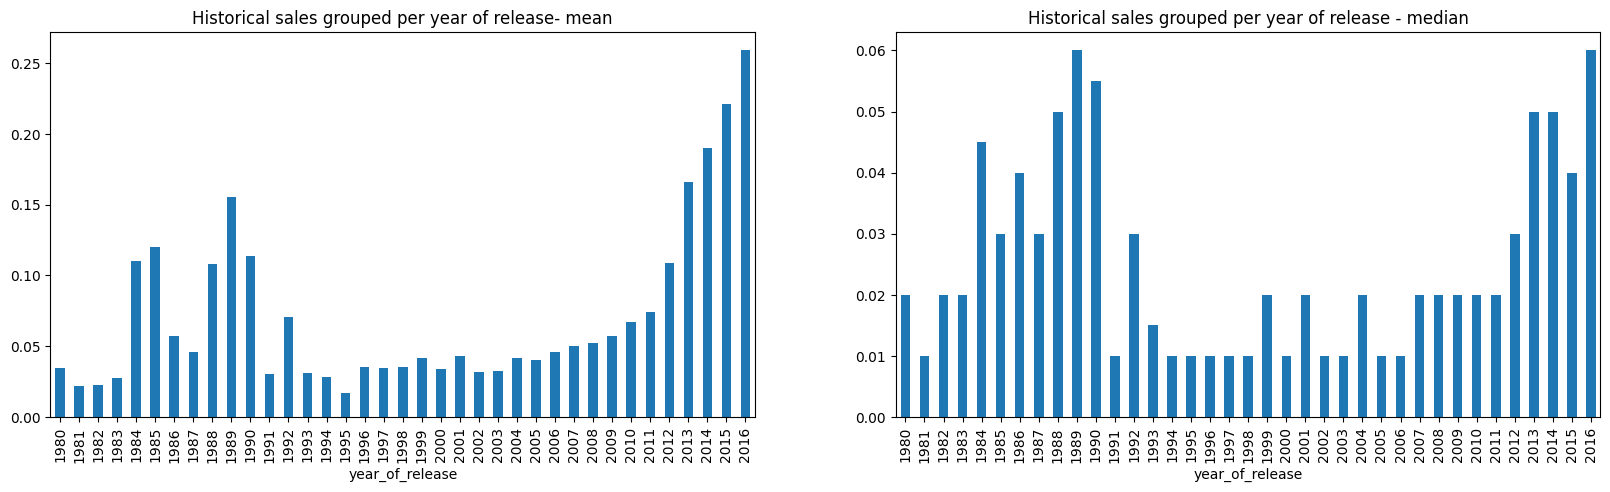

In [161]:
#Ingresos anuales de juegos por año de lanzamiento
plt.subplots(figsize=(20, 5)) 
df.groupby('year_of_release')['sales_per_year'].mean().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Historical sales grouped per year of release- mean')
df.groupby('year_of_release')['sales_per_year'].median().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Historical sales grouped per year of release - median')
plt.show()

In [162]:
#Mediana del año 1989 y 2016
df.query('year_of_release ==1989 or  year_of_release == 2016').groupby('year_of_release')['sales_per_year'].median()

year_of_release
1989    0.06
2016    0.06
Name: sales_per_year, dtype: float64

In [163]:
print('Ventas históricas por año de lanzamiento')
df.query('year_of_release ==1989 or  year_of_release == 2016').groupby('year_of_release')['total_sales'].describe()

Ventas históricas por año de lanzamiento


,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1989,17.0,4.320588,7.895161,0.06,1.10,1.61,2.12,30.26
2016,502.0,0.258845,0.698041,0.01,0.02,0.06,0.20,7.60


Al analizar las medianas de ingresos anuales de los juegos lanzados antes de 1994, se observa que son comparables a las de los juegos lanzados después de 2011. Un caso particular destaca esta similitud: la mediana de ingresos de los juegos lanzados en 1989 es idéntica a la de 2016. Sin embargo, al examinar otros estadísticos, se evidencia una diferencia clave en la distribución de los ingresos.

En 1989 se lanzaron apenas 17 juegos, y el ingreso máximo alcanzó los 30.26 millones de dólares (MDD). En contraste, en 2016 se lanzaron 502 juegos, pero el ingreso máximo fue de solo 7.6 MDD. Esta comparación refuerza la idea de que, con una mayor variedad de juegos disponibles, el gasto de los consumidores se distribuye entre más títulos, lo que reduce los ingresos promedio por juego.

                                                                     Ventas por plataforma

In [164]:
# agrupamos la información

platform_game_sales = df.groupby('platform').agg(total_sales = ('total_sales', 'sum'), 
                                                 median = ('total_sales', 'median'),
                                                 mean = ('total_sales', 'mean'), 
                                                 count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
platform_game_sales

,platform,total_sales,median,mean,count
0,PS2,1233.56,0.230,0.579953,2127
1,X360,961.24,0.280,0.780227,1232
2,PS3,931.34,0.280,0.713124,1306
3,Wii,891.18,0.190,0.692986,1286
4,DS,802.78,0.110,0.378491,2121
5,PS,727.58,0.260,0.611412,1190
6,PS4,314.14,0.200,0.801378,392
7,GBA,312.88,0.160,0.385795,811
8,PSP,289.53,0.090,0.242691,1193
9,3DS,257.81,0.120,0.503535,512


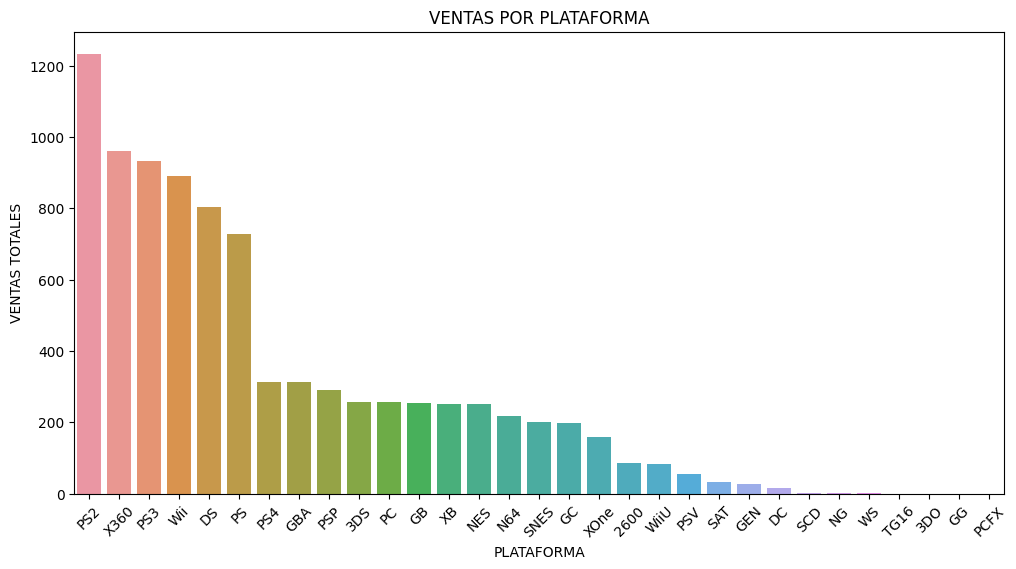

In [165]:
# mostramos en un gráfico de barras la información estudiada

plt.figure(figsize = (12, 6))
ax = sns.barplot(data = platform_game_sales, x = 'platform', y = 'total_sales')
ax.set_xlabel('PLATAFORMA')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR PLATAFORMA')
plt.xticks(rotation = 45)
plt.show()

                                              FILTRAMOS POR LAS SEIS PLATAFORMAS CON MAS VENTAS 

In [166]:
# filtramos a raíz de las ventas por plataforma

top_platform = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP']
df_top_platform = df.query('platform in @top_platform').reset_index(drop = True)
df_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.50
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,3.95
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4.10
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2.71
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2.63


In [167]:
#Medimos el tamaño
df_top_platform.shape

(9265, 13)

In [168]:
# agrupamos la información

top_platform_sales_year = df_top_platform.groupby(['platform', 'year_of_release']).agg(total_sales = ('total_sales', 'sum'),
                                                                                   median = ('total_sales', 'median'),
                                                                                   mean = ('total_sales', 'mean'),
                                                                                   count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
top_platform_sales_year

,platform,year_of_release,total_sales,median,mean,count
0,PS2,2004,211.81,0.32,0.817799,259
1,Wii,2009,206.97,0.20,0.636831,325
2,PS2,2002,205.38,0.29,0.733500,280
3,PS2,2003,184.31,0.36,0.719961,256
4,Wii,2008,171.32,0.21,0.607518,282
...,...,...,...,...,...,...
64,PS2,2011,0.45,0.06,0.064286,7
65,PSP,2014,0.24,0.01,0.024000,10
66,Wii,2016,0.18,0.18,0.180000,1
67,PSP,2015,0.12,0.02,0.040000,3


In [169]:
df_top_platform['year_of_release'].sort_values().unique()

array([1985, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [170]:
top_platform_sales_year = df_top_platform.groupby(['platform', 'year_of_release']).agg(total_sales = ('total_sales', 'sum'),
                                                                                    median = ('total_sales', 'median'),
                                                                                    mean = ('total_sales', 'mean'),
                                                                                    count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()

top_platform_unique = df_top_platform['year_of_release'].sort_values().unique()
top_platform_unique

array([1985, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

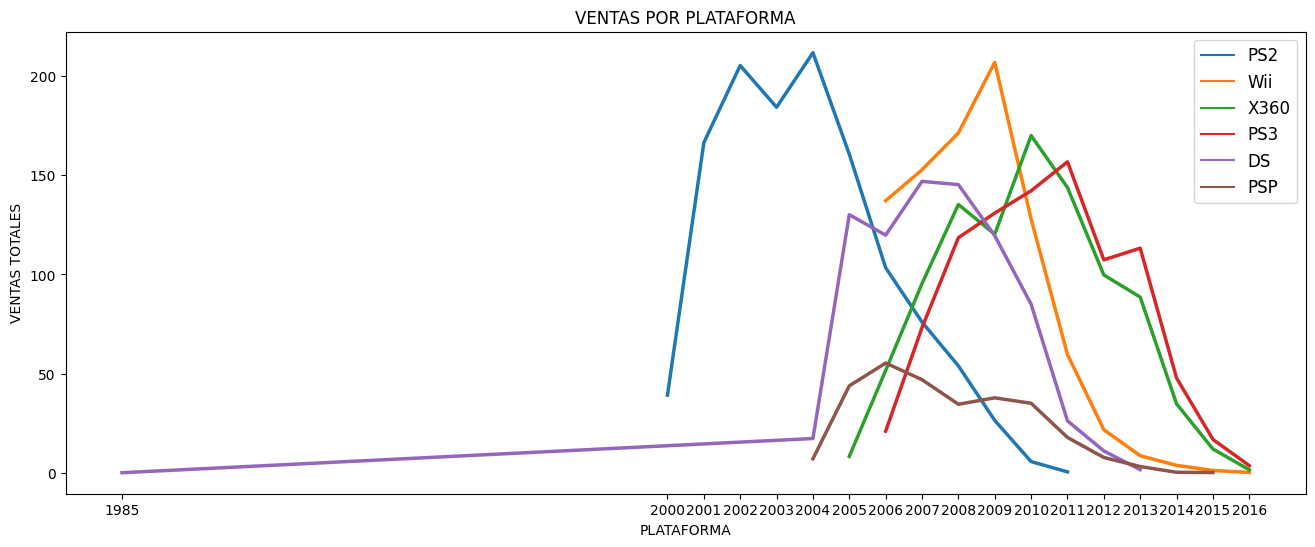

In [171]:
plt.figure(figsize = (16, 6))
ax = sns.lineplot(data = top_platform_sales_year, x = 'year_of_release', y = 'total_sales', hue = 'platform', lw = 2.5)
ax.set_xlabel('PLATAFORMA')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR PLATAFORMA')
plt.xticks(top_platform_unique)
plt.legend(fontsize = 'large')
plt.show()

                                            DEFINIENDO LA INFORMACION PARA EL AÑO DE REFERENCIA 2017

In [172]:
# filtramos los juegos que fueron lanzados en el 2013 y después

df_recent = df.query('year_of_release>= 2013').reset_index(drop = True)
df_recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.26
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4.07
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,7.32
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60,3.65
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21


In [173]:
df_recent_pivot = df_recent.groupby(['platform', 'year_of_release']).agg(total_sales = ('total_sales', 'sum'),
                                                                      median = ('total_sales', 'median'),
                                                                      mean = ('total_sales', 'mean'),
                                                                      count = ('name', 'count')).reset_index()
            
df_recent_pivot     

,platform,year_of_release,total_sales,median,mean,count
0,3DS,2013,56.57,0.100,0.621648,91
1,3DS,2014,43.76,0.090,0.547000,80
2,3DS,2015,27.78,0.090,0.323023,86
3,3DS,2016,15.14,0.080,0.329130,46
4,DS,2013,1.54,0.150,0.192500,8
5,PC,2013,12.38,0.175,0.325789,38
6,PC,2014,13.28,0.100,0.282553,47
7,PC,2015,8.52,0.080,0.170400,50
8,PC,2016,5.25,0.035,0.097222,54
9,PS3,2013,113.25,0.310,0.898810,126


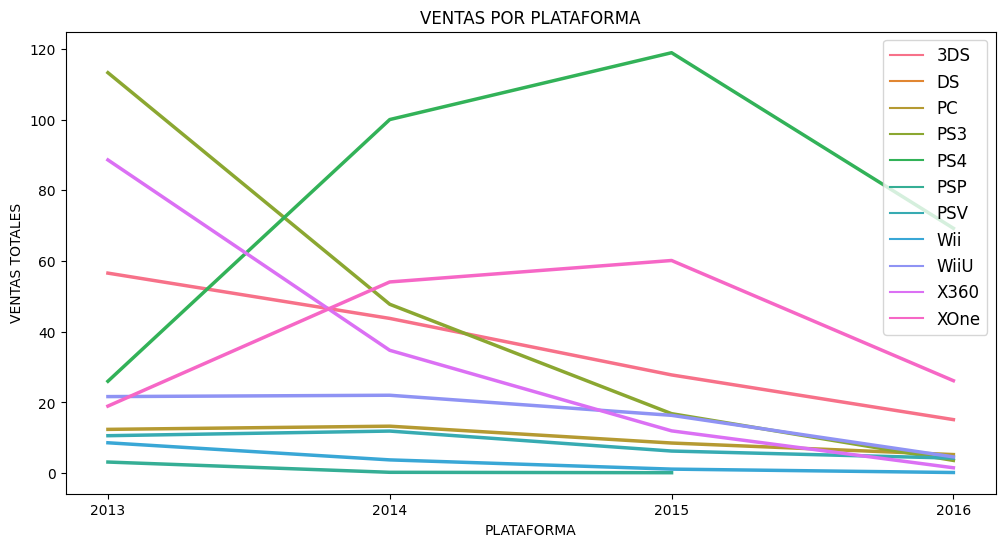

In [174]:
# graficamos con la información obtenida

plt.figure(figsize = (12, 6))
ax = sns.lineplot(data = df_recent_pivot, x = 'year_of_release', y = 'total_sales', hue = 'platform', lw = 2.5)
ax.set_xlabel('PLATAFORMA')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR PLATAFORMA')
plt.xticks([2013, 2014, 2015, 2016])
plt.legend(fontsize = 'large')
plt.show()

In [175]:
platform_recent_sales = df_recent.groupby('platform').agg(total_sales = ('total_sales', 'sum'),
                                                          median = ('total_sales', 'median'),
                                                          mean = ('total_sales', 'mean'),
                                                          count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
                                                          
platform_recent_sales   

,platform,total_sales,median,mean,count
0,PS4,314.14,0.200,0.801378,392
1,PS3,181.43,0.150,0.525884,345
2,XOne,159.32,0.220,0.645020,247
3,3DS,143.25,0.090,0.472772,303
4,X360,136.80,0.265,0.735484,186
5,WiiU,64.63,0.200,0.562000,115
6,PC,39.43,0.080,0.208624,189
7,PSV,32.99,0.040,0.092151,358
8,Wii,13.66,0.180,0.593913,23
9,PSP,3.50,0.020,0.052239,67


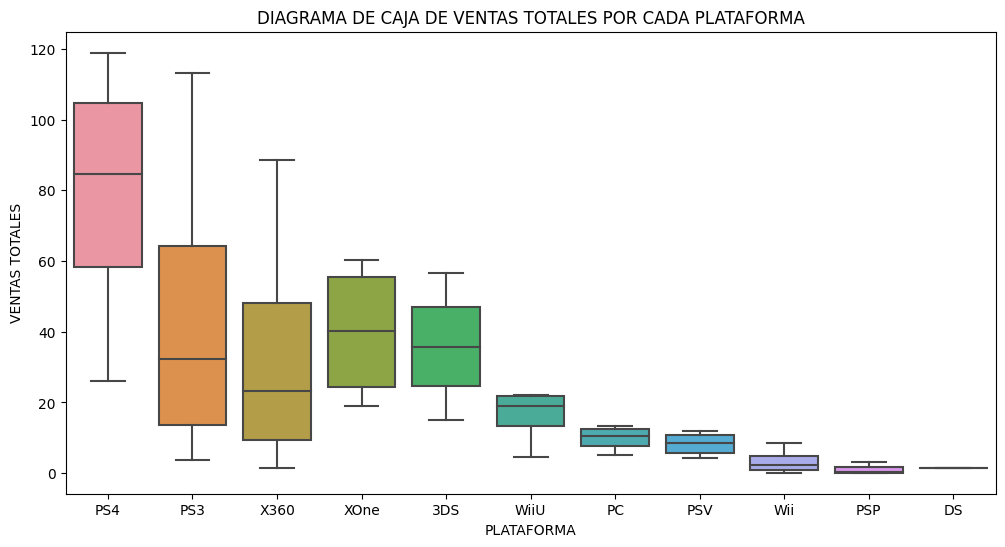

In [176]:
df_recent_pivot = df_recent_pivot.sort_values(by = 'total_sales', ascending = False)

plt.figure(figsize = (12, 6))
sns.boxplot(data = df_recent_pivot, x = 'platform', y = 'total_sales')
plt.xlabel('PLATAFORMA')
plt.ylabel('VENTAS TOTALES')
plt.title('DIAGRAMA DE CAJA DE VENTAS TOTALES POR CADA PLATAFORMA')
plt.show()

Perfecto, gracias por el comentario!

                                     Análisis entre las reseñas de usuarios y criticas con las ventas

In [177]:
# estudiamos la relación entre las reseñas de usuarios y criticas con las ventas filtrando el dataset, para ver la correlación

df_ps4 = df_recent.query('platform == "PS4"').reset_index(drop = True)
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,7.32
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,4.29
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98,3.99
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,2.55


In [178]:
#tamaño de la mestra
df_ps4.shape

(392, 13)

In [179]:
sales_review_corr = df_ps4[['total_sales', 'critic_score', 'user_score']]
sales_review_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000



CORRELACION ENTRE critic_score Y VENTAS : 0.40656790206178095


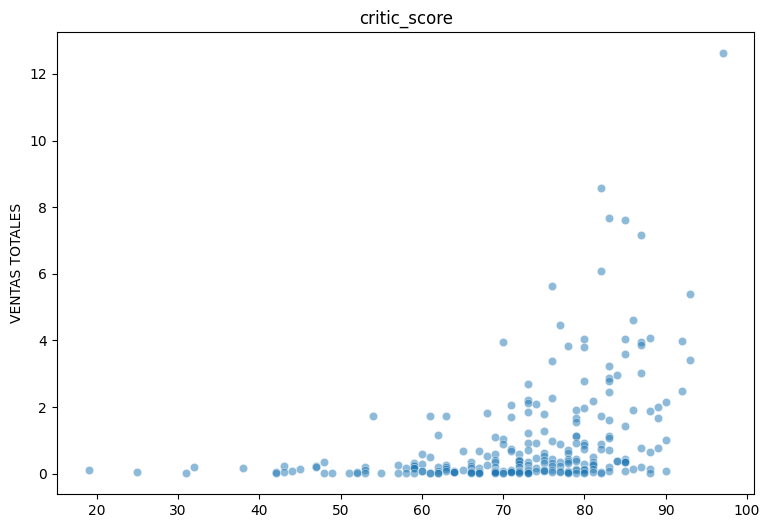



CORRELACION ENTRE user_score Y VENTAS : -0.031957110204556376


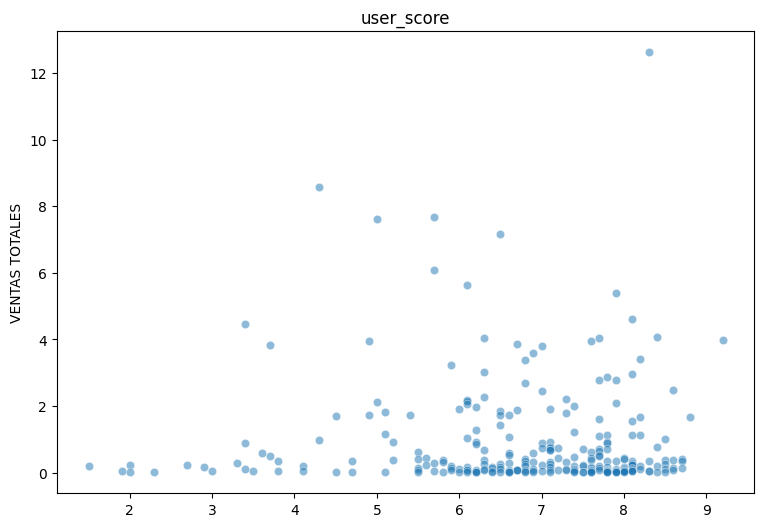

In [180]:
review = ['critic_score', 'user_score']

for column in review:
    print()
    print('CORRELACION ENTRE', column, 'Y VENTAS', ':', df_ps4[column].corr(df_ps4['total_sales']))
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = df_ps4[column], y = df_ps4['total_sales'], data = df_ps4, alpha = 0.5)
    plt.xlabel('')
    plt.ylabel('VENTAS TOTALES')
    plt.title(column)
    plt.show()
    print()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

                                                Comparación de ventas por juego entre plataformas

In [181]:
#estudiamos las principales plataformas y filtramos

top_console = ['PS4', 'PS3', 'X360', 'XONE', '3DS']

df_top_platform_recent = df_recent.query('platform in @top_console').reset_index(drop = True)
df_top_platform_recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.26
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4.07
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,7.32
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60,3.65
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21


In [182]:
df_top_platform_recent.shape

(1226, 13)

In [183]:
cross_platform_sales = df_top_platform_recent.pivot_table(values = 'total_sales', index = 'name', columns = 'platform', aggfunc = 'sum').sort_values(by = 'PS3', ascending = False).dropna()

cross_platform_sales

platform,3DS,PS3,PS4,X360
name,,,,
FIFA 14,0.23,6.46,3.01,4.22
FIFA 15,0.46,4.28,6.08,2.92
LEGO Marvel Super Heroes,0.89,1.83,1.62,2.22
Skylanders SWAP Force,0.24,1.02,0.38,1.32
The LEGO Movie Videogame,0.69,0.93,0.67,1.27
LEGO Jurassic World,0.62,0.85,0.90,0.87
Lego Batman 3: Beyond Gotham,0.45,0.73,0.92,0.89
Skylanders: Trap Team,0.28,0.67,0.44,0.89
LEGO The Hobbit,0.24,0.46,0.60,0.45


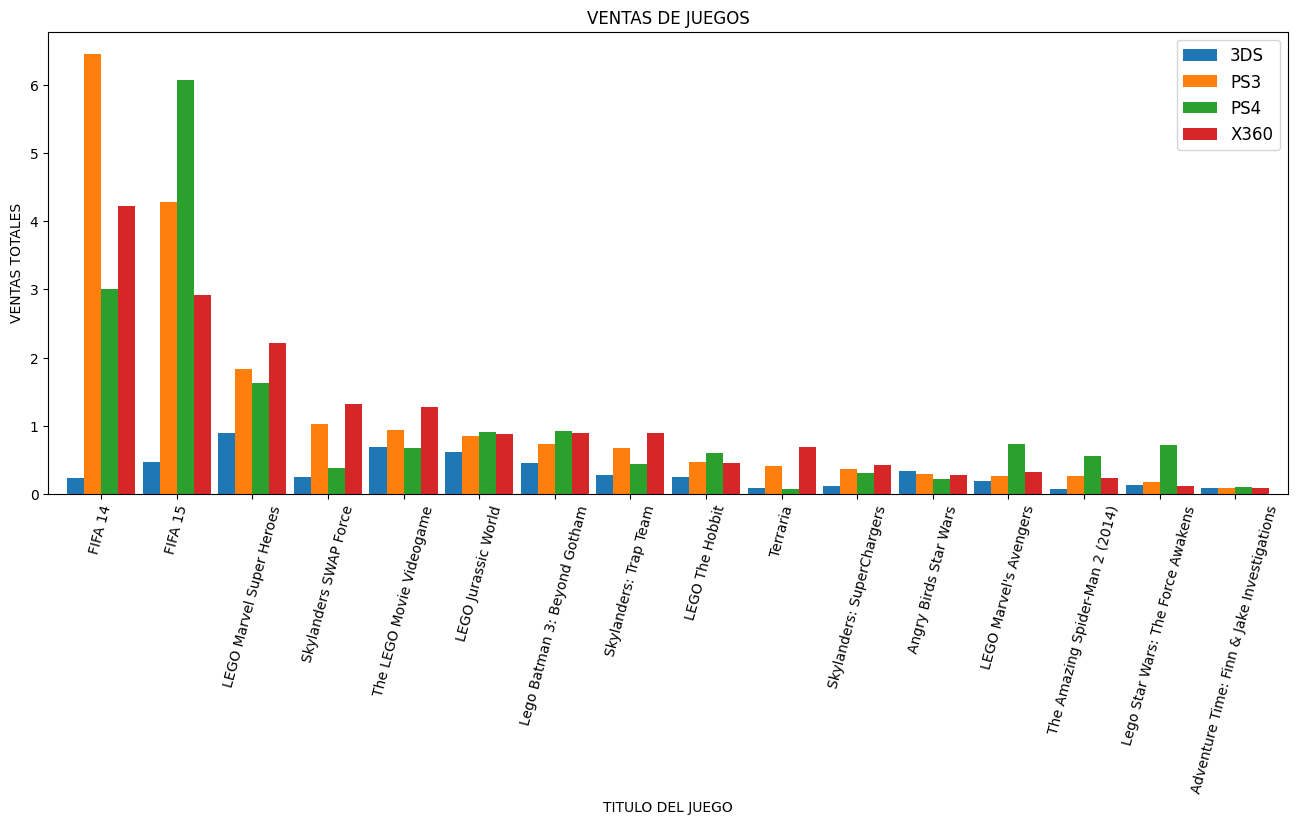

In [184]:
cross_platform_sales.plot(kind = 'bar', figsize = (16, 6), width = 0.9)
plt.xlabel('TITULO DEL JUEGO')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS DE JUEGOS')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 75)
plt.show()

                                         Distribución de los juegos por género

In [185]:
#Estudiamos la distribución agrupando por género

df_genre_recent = df_recent.groupby('genre').agg(total_sales = ('total_sales', 'sum'),
                                                 median = ('total_sales', 'median'),
                                                 mean = ('total_sales', 'mean'),
                                                 count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
                                                
df_genre_recent

,genre,total_sales,median,mean,count
0,Action,321.87,0.110,0.420196,766
1,Shooter,232.98,0.450,1.245882,187
2,Sports,150.65,0.240,0.703972,214
3,Role-Playing,145.89,0.125,0.499623,292
4,Misc,62.82,0.100,0.405290,155
5,Platform,42.63,0.225,0.576081,74
6,Racing,39.89,0.120,0.469294,85
7,Fighting,35.31,0.125,0.441375,80
8,Adventure,23.64,0.030,0.096490,245
9,Simulation,21.76,0.100,0.350968,62


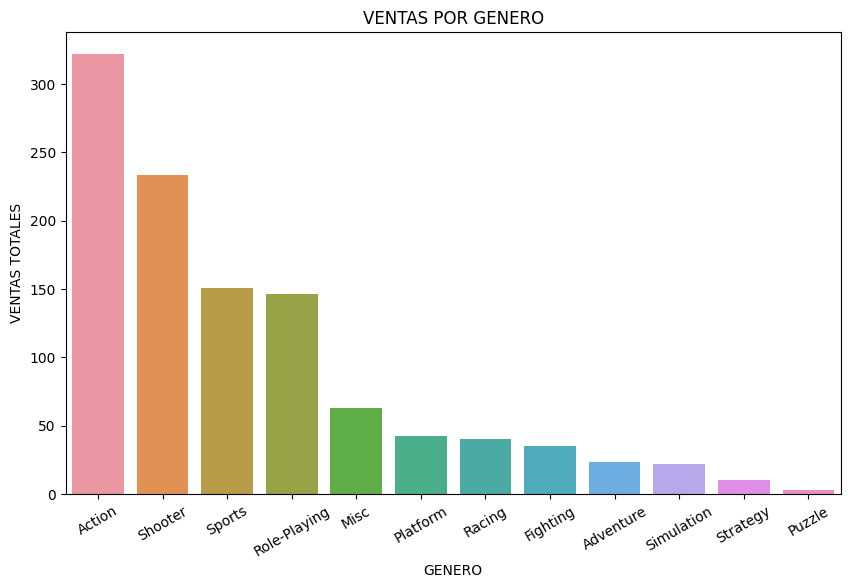

In [186]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = df_genre_recent, x = 'genre', y = 'total_sales')
ax.set_xlabel('GENERO')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR GENERO')
plt.xticks(rotation = 30)
plt.show()

                                        Resumen del Análisis de Ventas de Videojuegos
1. Juegos lanzados por año:
El análisis del número de juegos lanzados por año muestra que las ventas comenzaron a registrarse a partir de 1980, con un crecimiento sostenido hasta 1991, cuando las ventas comenzaron a incrementarse significativamente. Este crecimiento alcanzó su punto máximo entre 2008 y 2009, seguido de una tendencia a la baja en los años posteriores.

2. Variación de ventas por plataforma:
Las plataformas con mayores ventas acumuladas fueron:
PS2, XBOX 360, PS3, Wii, DS y PS. Estas plataformas dominaron el mercado en distintas etapas, especialmente entre los años 2000 y 2012.

3. Definición del año de referencia (2017):
Para enfocar el análisis reciente, se filtraron los datos a partir del año 2013. En este periodo, la consola PS4 se posicionó como la más vendida, seguida por la PS3, y luego por sus principales competidoras: XBOX 360 y XBOX One.

4. Diagramas de caja por plataforma:
Mediante diagramas de caja (boxplots), se visualizó la distribución de las ventas por plataforma para el periodo posterior a 2013. Después de las consolas principales mencionadas, destacan en ventas 3DS y Wii U, aunque con menor volumen total.

5. Reseñas de usuarios y críticas vs. ventas:
El análisis de la correlación entre las reseñas (de usuarios y críticas) y las ventas no mostró una relación significativa. Esto sugiere que otros factores, como el marketing, la franquicia o la plataforma, influyen más directamente en el éxito comercial de un juego.

6. Comparación de juegos más vendidos por plataforma:
Se identificaron los juegos más vendidos por plataforma:

PS3: FIFA 14

PS4: FIFA 15

XBOX 360: FIFA 14

3DS: Lego Marvel Super Heroes

Estos hallazgos son coherentes con las gráficas de ventas históricas, que muestran una disminución constante en las ventas desde el pico en 2009.

7. Distribución de juegos por género:
Los géneros más vendidos fueron:

Acción

Disparos (Shooter)

Deportes

Rol (RPG)

Clásicos (Puzzle/Arcade)

Estos géneros concentran la mayoría del mercado, especialmente en las consolas más populares.

                                                           Estudio 

In [187]:
# mostramos una muestra del dataset nuevo

df_recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.26
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4.07
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,7.32
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60,3.65
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21


                                        Determinar las 5 principales plataformas por cada región

Estudio de las 5 plataformas de la región NA

In [188]:
# filtramos las plataformas por la region NA

na_top_platform = df_recent.groupby('platform').agg(na_sales = ('na_sales', 'sum'),
                                                    total_sales = ('total_sales', 'sum'),
                                                    na_median = ('na_sales', 'median'),
                                                    na_mean = ('na_sales', 'mean'),
                                                    na_count = ('name', 'count')).sort_values(by = 'na_sales', ascending = False).reset_index()

na_top_platform.head()

,platform,na_sales,total_sales,na_median,na_mean,na_count
0,PS4,108.74,314.14,0.06,0.277398,392
1,XOne,93.12,159.32,0.12,0.377004,247
2,X360,81.66,136.80,0.15,0.439032,186
3,PS3,63.50,181.43,0.03,0.184058,345
4,3DS,38.20,143.25,0.00,0.126073,303


Estudio de las 5 plataformas de la región EU

In [189]:
# filtramos las plataformas por la region EU

eu_top_platform = df_recent.groupby('platform').agg(eu_sales = ('eu_sales', 'sum'),
                                                    total_sales = ('total_sales', 'sum'),
                                                    eu_median = ('eu_sales', 'median'),
                                                    eu_mean = ('eu_sales', 'mean'),
                                                    eu_count = ('name', 'count')).sort_values(by = 'eu_sales', ascending = False).reset_index()

eu_top_platform.head()

,platform,eu_sales,total_sales,eu_median,eu_mean,eu_count
0,PS4,141.09,314.14,0.08,0.359923,392
1,PS3,67.81,181.43,0.02,0.196551,345
2,XOne,51.59,159.32,0.07,0.208866,247
3,X360,42.52,136.80,0.08,0.228602,186
4,3DS,30.96,143.25,0.00,0.102178,303


Estudio de las 5 plataformas de la región JP

In [190]:
# filtramos las plataformas por la region JP

jp_top_platform = df_recent.groupby('platform').agg(jp_sales = ('jp_sales', 'sum'),
                                                    total_sales = ('total_sales', 'sum'),
                                                    jp_median = ('jp_sales', 'median'),
                                                    jp_mean = ('jp_sales', 'mean'),
                                                    jp_count = ('name', 'count')).sort_values(by = 'jp_sales', ascending = False).reset_index()

jp_top_platform.head()

,platform,jp_sales,total_sales,jp_median,jp_mean,jp_count
0,3DS,67.81,143.25,0.06,0.223795,303
1,PS3,23.35,181.43,0.03,0.067681,345
2,PSV,18.59,32.99,0.03,0.051927,358
3,PS4,15.96,314.14,0.01,0.040714,392
4,WiiU,10.88,64.63,0.00,0.094609,115


                                Estudio de las cuotas de mercado de las diversas plataformas

In [191]:
# creamos una tabla que muestra las cuotas de mercado de las diversas plataformas

top_platform_share = df_recent.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'platform', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()

top_platform_share

,platform,eu_sales,jp_sales,na_sales
0,PS4,141.09,15.96,108.74
1,XOne,51.59,0.34,93.12
2,X360,42.52,0.51,81.66
3,PS3,67.81,23.35,63.50
4,3DS,30.96,67.81,38.20
5,WiiU,19.85,10.88,29.21
6,PC,25.36,0.00,11.11
7,Wii,5.93,0.05,6.56
8,PSV,6.10,18.59,5.04
9,DS,0.85,0.00,0.57


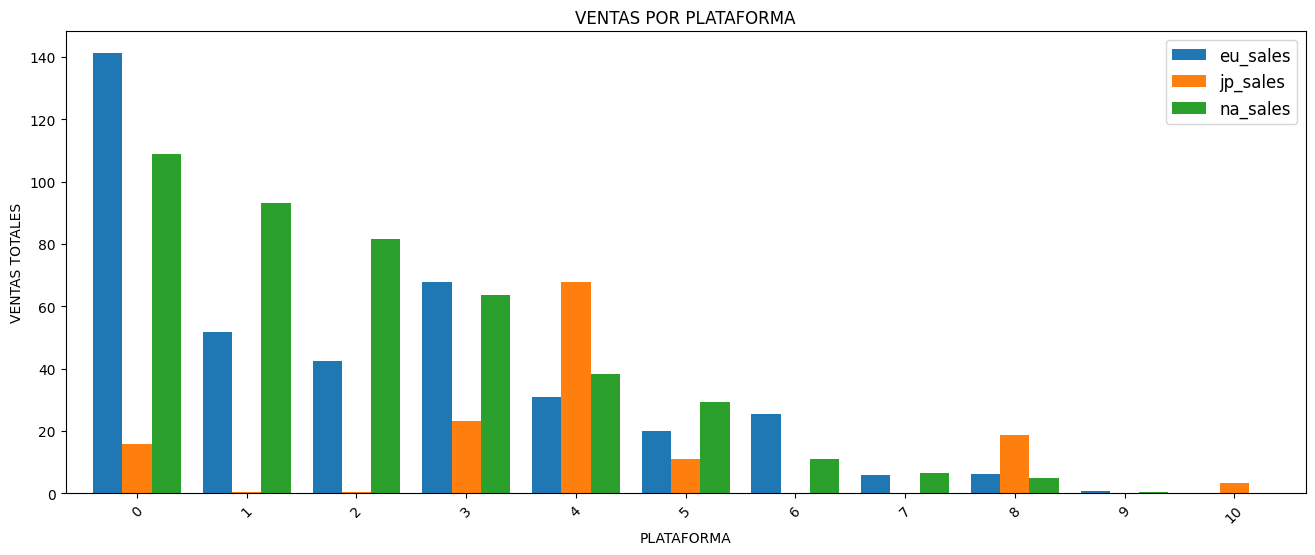

In [192]:
# creamos un diagrama de barra con loa información estudiada anteriormente

top_platform_share.plot(kind = 'bar', figsize = (16, 6), width = 0.8)
plt.xlabel('PLATAFORMA')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS POR PLATAFORMA')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

                                     Determinar las 5 principales generos por cada región

Estudio de los 5 genéros de la región NA

In [193]:
# filtramos los géneros por la región NA

na_top_genre = df_recent.groupby('genre').agg(na_sales = ('na_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              na_median = ('na_sales', 'median'), 
                                              na_mean = ('na_sales', 'mean'), 
                                              na_count = ('name', 'count')).sort_values(by = 'na_sales', ascending = False).reset_index()

na_top_genre.head()

,genre,na_sales,total_sales,na_median,na_mean,na_count
0,Action,126.05,321.87,0.02,0.164556,766
1,Shooter,109.74,232.98,0.20,0.586845,187
2,Sports,65.27,150.65,0.08,0.305000,214
3,Role-Playing,46.40,145.89,0.02,0.158904,292
4,Misc,27.49,62.82,0.01,0.177355,155


Estudio de los 5 genéros de la región EU

In [194]:
# filtramos los géneros por la región EU

eu_top_genre = df_recent.groupby('genre').agg(eu_sales = ('eu_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              eu_median = ('eu_sales', 'median'), 
                                              eu_mean = ('eu_sales', 'mean'), 
                                              eu_count = ('name', 'count')).sort_values(by = 'eu_sales', ascending = False).reset_index()

eu_top_genre.head()

,genre,eu_sales,total_sales,eu_median,eu_mean,eu_count
0,Action,118.13,321.87,0.02,0.154217,766
1,Shooter,87.86,232.98,0.19,0.469840,187
2,Sports,60.52,150.65,0.05,0.282804,214
3,Role-Playing,36.97,145.89,0.01,0.126610,292
4,Racing,20.19,39.89,0.06,0.237529,85


Estudio de los 5 genéros de la región JP

In [195]:
#Filtramos los géneros por la región JP

jp_top_genre = df_recent.groupby('genre').agg(jp_sales = ('jp_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              jp_median = ('jp_sales', 'median'), 
                                              jp_mean = ('jp_sales', 'mean'), 
                                              jp_count = ('name', 'count')).sort_values(by = 'jp_sales', ascending = False).reset_index()

jp_top_genre.head()

,genre,jp_sales,total_sales,jp_median,jp_mean,jp_count
0,Role-Playing,51.04,145.89,0.05,0.174795,292
1,Action,40.49,321.87,0.01,0.052859,766
2,Misc,9.20,62.82,0.02,0.059355,155
3,Fighting,7.65,35.31,0.03,0.095625,80
4,Shooter,6.61,232.98,0.00,0.035348,187


Estudio de las cuotas de mercado de las diversas regiones

In [196]:
#Creamos una tabla que muestra las cuotas de mercado de los diversos géneros

top_genre_share = df_recent.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'genre', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()


top_genre_share

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Shooter,87.86,6.61,109.74
2,Sports,60.52,5.41,65.27
3,Role-Playing,36.97,51.04,46.40
4,Misc,20.04,9.20,27.49
5,Platform,15.58,4.79,18.14
6,Fighting,8.55,7.65,15.55
7,Racing,20.19,2.30,12.96
8,Adventure,8.25,5.82,7.14
9,Simulation,10.92,4.52,4.86


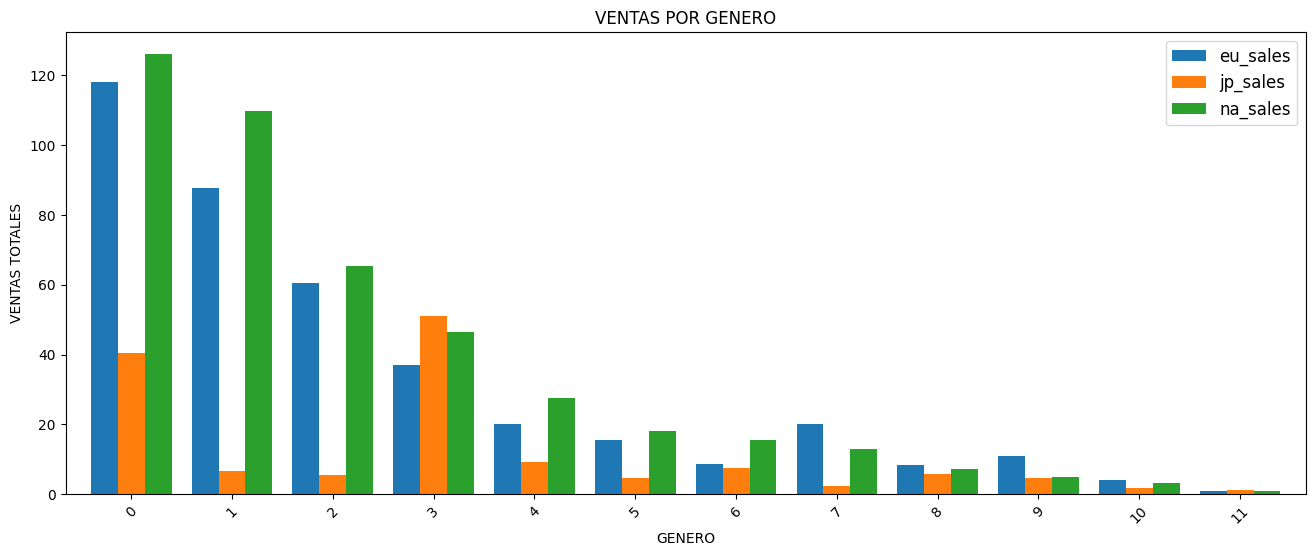

In [197]:
#Creamos un diagrama de barra con loa información estudiada anteriormente

top_genre_share.plot(kind = 'bar', figsize = (16 , 6), width = 0.8)
plt.xlabel('GENERO')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS POR GENERO')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

Determinar las 5 principales clasificaciones por cada región

In [198]:
#Filtramos las clasificaciones por la región NA

na_top_rating = df_recent.groupby('rating').agg(na_sales = ('na_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              na_median = ('na_sales', 'median'), 
                                              na_mean = ('na_sales', 'mean'), 
                                              na_count = ('name', 'count')).sort_values(by = 'na_sales', ascending = False).reset_index()

na_top_rating.head()

,rating,na_sales,total_sales,na_median,na_mean,na_count
0,M,165.21,371.68,0.14,0.447724,369
1,RP,89.42,276.84,0.00,0.091525,977
2,E,79.05,200.16,0.05,0.261755,302
3,E10+,54.24,115.39,0.12,0.215238,252
4,T,49.79,126.62,0.04,0.149520,333


Estudio de las 5 clasificaciones de la región EU

In [199]:
#Filtramos las clasificaciones por la región EU

eu_top_rating = df_recent.groupby('rating').agg(eu_sales = ('eu_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              eu_median = ('eu_sales', 'median'), 
                                              eu_mean = ('eu_sales', 'mean'), 
                                              eu_count = ('name', 'count')).sort_values(by = 'eu_sales', ascending = False).reset_index()

eu_top_rating.head()

,rating,eu_sales,total_sales,eu_median,eu_mean,eu_count
0,M,145.32,371.68,0.130,0.393821,369
1,E,83.36,200.16,0.055,0.276026,302
2,RP,78.91,276.84,0.000,0.080768,977
3,E10+,42.69,115.39,0.100,0.169405,252
4,T,41.95,126.62,0.040,0.125976,333


Estudio de las 5 clasificaciones de la región JP

In [200]:
#Filtramos las clasificaciones por la región JP

jp_top_rating= df_recent.groupby('rating').agg(jp_sales = ('jp_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              jp_median = ('jp_sales', 'median'), 
                                              jp_mean = ('jp_sales', 'mean'), 
                                              jp_count = ('name', 'count')).sort_values(by = 'jp_sales', ascending = False).reset_index()

jp_top_rating.head()

,rating,jp_sales,total_sales,jp_median,jp_mean,jp_count
0,RP,85.05,276.84,0.02,0.087052,977
1,T,20.59,126.62,0.01,0.061832,333
2,E,15.14,200.16,0.00,0.050132,302
3,M,14.11,371.68,0.00,0.038238,369
4,E10+,5.89,115.39,0.00,0.023373,252


Estudio de las cuotas de mercado de las diversas clasificaciones

In [201]:
#Creamos una tabla que muestra las cuotas de mercado de las diversas clasificaciones

top_rating_share = df_recent.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'rating', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()

top_rating_share

,rating,eu_sales,jp_sales,na_sales
0,M,145.32,14.11,165.21
1,RP,78.91,85.05,89.42
2,E,83.36,15.14,79.05
3,E10+,42.69,5.89,54.24
4,T,41.95,20.59,49.79


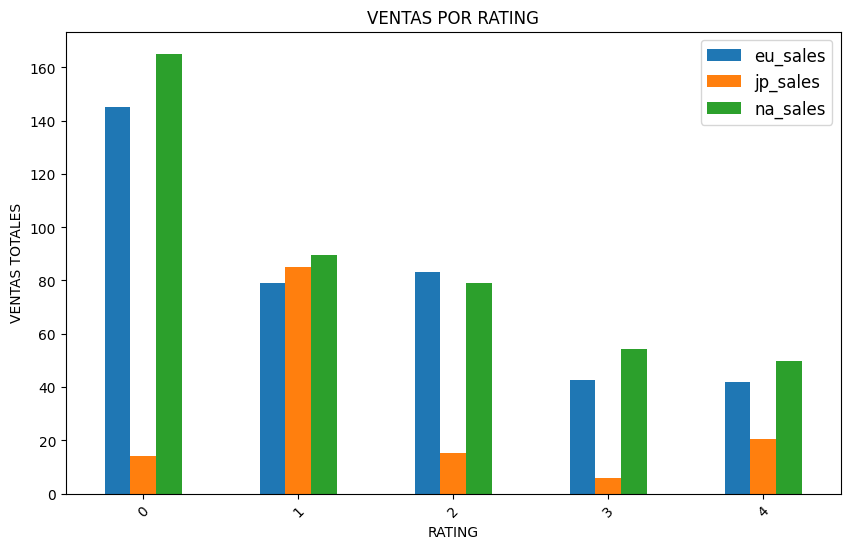

In [202]:
# creamos un diagrama de barra con loa información estudiada anteriormente

top_rating_share.plot(kind = 'bar', figsize = (10 , 6))
plt.xlabel('RATING')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS POR RATING')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

Conclusiones Intermedias por Región
1. Principales plataformas por región:

Norteamérica (NA) y Europa (EU):
La plataforma PlayStation 4 (PS4) lideró en ventas en ambas regiones.

Japón (JP):
La consola más vendida fue la Nintendo 3DS, reflejando las diferencias en preferencias del mercado japonés.

2. Géneros más vendidos por región:

NA y EU:
El género más popular fue acción, lo que indica una fuerte preferencia por títulos dinámicos y de ritmo rápido en estas regiones.

JP:
El género dominante fue el rol (RPG), alineado con la tradición de éxito de franquicias japonesas como Final Fantasy, Dragon Quest, y Pokémon.

3. Clasificaciones más comunes por región:

NA y EU:
La clasificación con mayor volumen de ventas fue M (Mature), lo que sugiere una audiencia predominantemente adulta.

JP:
La clasificación más vendida fue T (Teen), lo que podría indicar una preferencia por contenido apto para adolescentes o menor restricción hacia ese tipo de juegos.



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

                                          Pruebas de Hipotesis

El promedio de los usuarios de las plataformas Xbox One y PC es la misma

Ho: El promedio de los usuarios de las plataformas Xbox One y Pc es la misma.
H1: El promedio de los usuarios de las plataformas Xbox One y Pc es diferente.

Usamos un valor alpha del 5%.

In [203]:
#Filtramos el dataset por las plataformas

df_recent_xone = df_recent.query('platform == "XOne"').reset_index(drop = True)
df_recent_pc = df_recent.query('platform == "PC"').reset_index(drop = True)
nan_xone = df_recent_xone.isna().sum()
print("Valores NaN en df_recent_xone (Xbox One):\n", nan_xone)

Valores NaN en df_recent_xone (Xbox One):
 name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       78
user_score         65
rating              0
total_sales         0
sales_per_year      0
dtype: int64


In [204]:
#Creamos una función para mostrar las distribuciones

def hisplot (a, b, c):
    plt.figure(figsize = (10, 10))
    sns.histplot(a[b], bins = 30, kde = True)
    plt.xlabel(b)
    plt.ylabel('JUEGO')
    plt.title(c)
    plt.show()

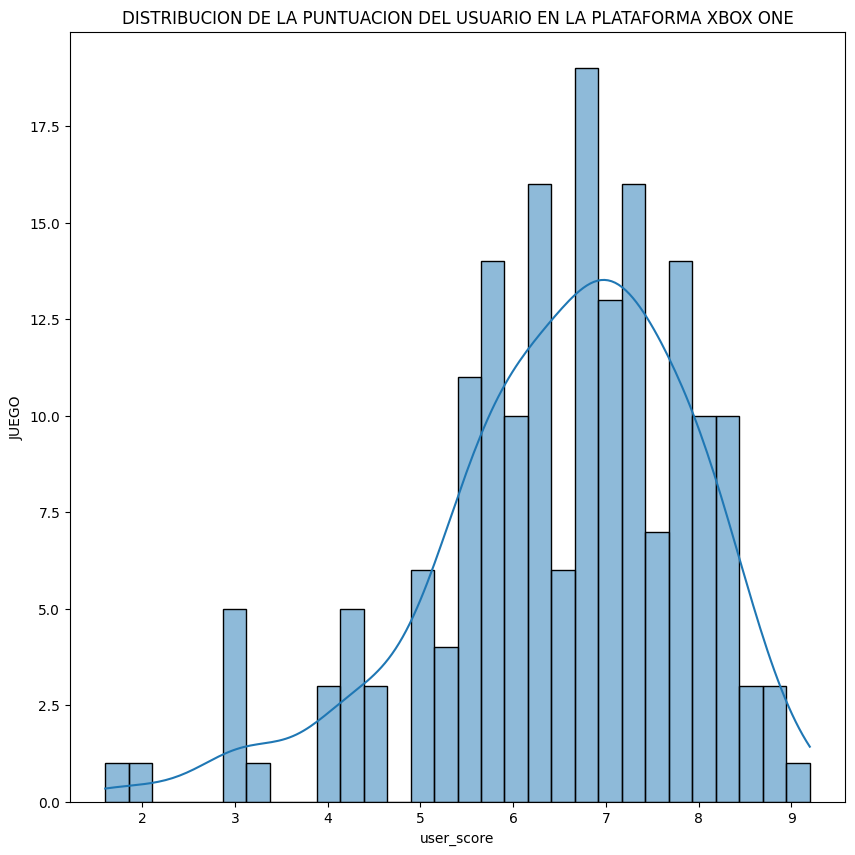

In [205]:
#Estudiamos la distribución de la plataforma Xbox One

hisplot(df_recent_xone, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO EN LA PLATAFORMA XBOX ONE')

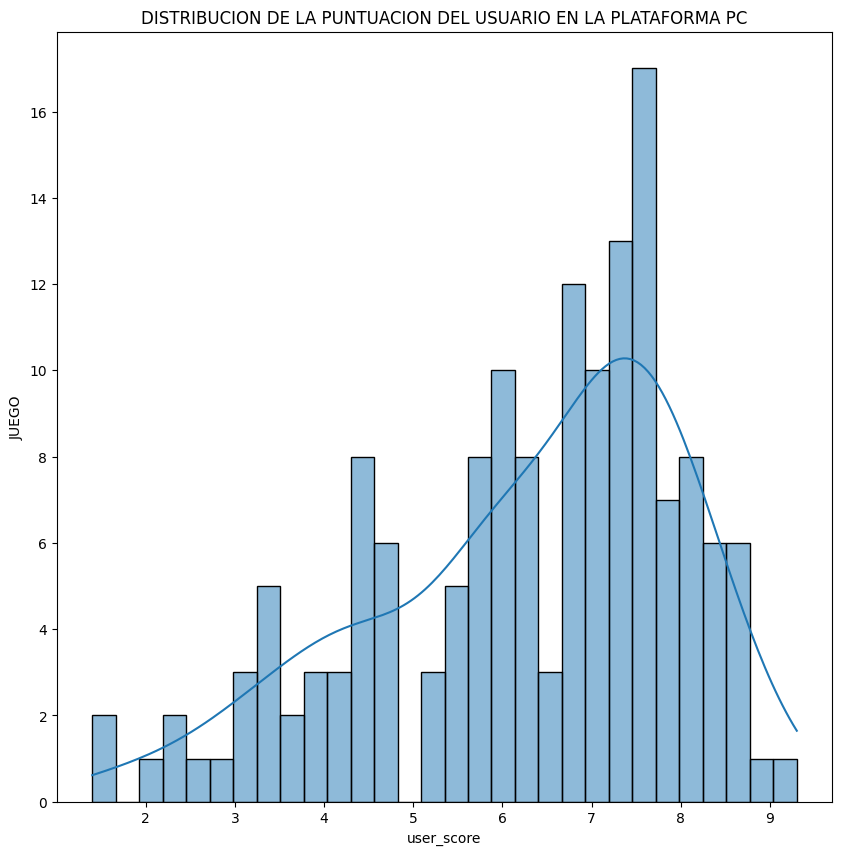

In [206]:
#Estudiamos la distribución de la plataforma PC
hisplot(df_recent_pc, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO EN LA PLATAFORMA PC')

In [207]:
# utilizamos el test de Levene para determinar si usamos equal_var en True o False

platform_var_levene = st.levene(df_recent_xone['user_score'], df_recent_pc['user_score'], center = 'median')
platform_var_levene

LeveneResult(statistic=nan, pvalue=nan)

In [208]:
# procedemos con los cálculos

alpha = 0.05
results = st.ttest_ind(df_recent_xone['user_score'], df_recent_pc['user_score'], equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('RECHAZAMOS LA HIPOTESIS NULA')
else:
    print('NO RECHAZAMOS LA HIPOTESIS NULA, El promedio de los usuarios de las plataformas Xbox One y PC es la misma')

p-value: nan
NO RECHAZAMOS LA HIPOTESIS NULA, El promedio de los usuarios de las plataformas Xbox One y PC es la misma


                       El promedio de los usuarios al jugar géneros de Acción y Deportes es diferente

Hipótesis:

H0: El promedio de los usuarios de los géneros de acción y deportes es la misma.
H1: El promedio de los usuarios de los géneros de acción y deportes es diferente.

Usamos un valor alpha del 5%.

In [209]:
#Filtramos el dataset por los géneros y eliminamos los valores NaN

df_recent_action = df_recent.query('genre == "Action"').reset_index(drop = True)
df_recent_action = df_recent_action.dropna(subset=['user_score'])

df_recent_sports = df_recent.query('genre == "Sports"').reset_index(drop = True)
df_recent_sports = df_recent_sports.dropna(subset=['user_score'])

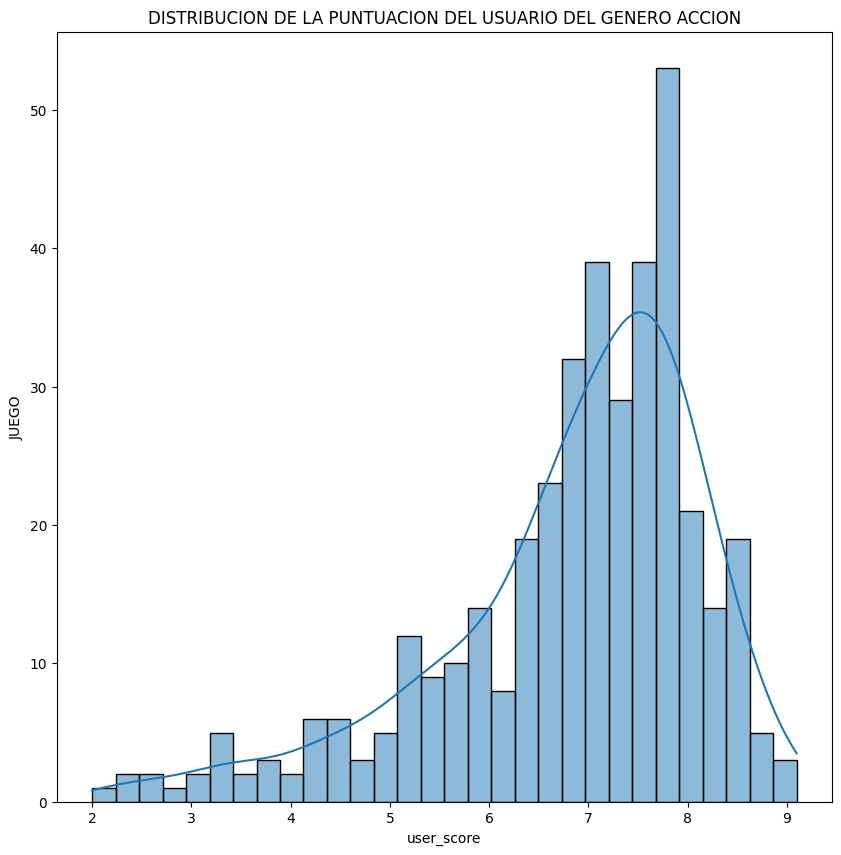

In [210]:
#Estudiamos la distribución del género acción

hisplot(df_recent_action, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO DEL GENERO ACCION')

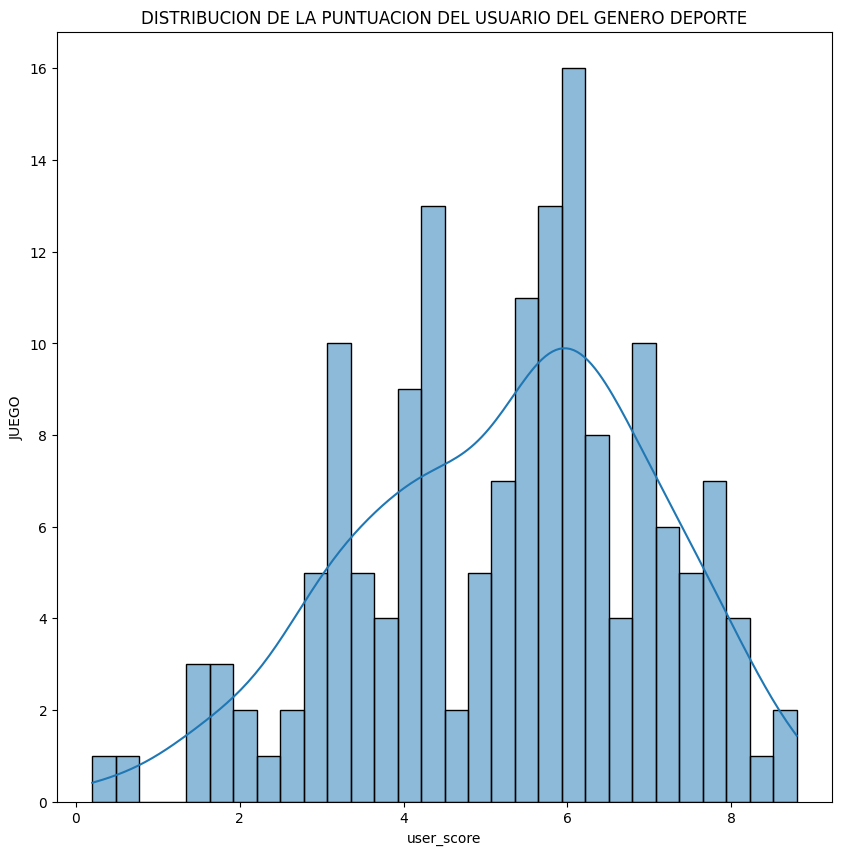

In [211]:
#Estudiamos la distribución del género deporte

hisplot(df_recent_sports, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO DEL GENERO DEPORTE')

In [212]:
#Hacemos la prueba de Levene para determinar si usamos equal_var False o True

genre_var_levene = st.levene(df_recent_action['user_score'], df_recent_sports['user_score'], center = 'median')
genre_var_levene

LeveneResult(statistic=26.20600718947607, pvalue=4.2566688218274047e-07)

In [213]:
#Procedemos con los cálculos

alpha = 0.05
results = st.ttest_ind(df_recent_action['user_score'], df_recent_sports['user_score'], equal_var = True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('RECHAZAMOS LA HIPOTESIS NULA ,El promedio de los usuarios al jugar géneros de Acción y Deportes NO es diferente:')
else:
    print('NO RECHAZAMOS LA HIPOTESIS NULA ,El promedio de los usuarios al jugar géneros de Acción y Deportes es diferente:')

p-value: 1.0517832389140023e-27
RECHAZAMOS LA HIPOTESIS NULA ,El promedio de los usuarios al jugar géneros de Acción y Deportes NO es diferente:


Gracias Por el comentario y si elimine los valores NaN y el resultado fue diferente.

                                  Conclusiones Finales del Análisis de Ventas de Videojuegos
   Carga y preparación de los datos
•	Se trabajó con un dataset que contiene 16,715 filas y 11 columnas.
•	Se estandarizaron los nombres de las columnas a minúsculas para facilitar el trabajo.
•	Se trabajó específicamente con las columnas: genre, name, year_release, critic_score, user_score y rating.
•	Se convirtió la columna year_of_release a un tipo de dato más adecuado para análisis temporal.
•	No se encontraron valores duplicados.
•	Se creó una nueva columna llamada total_sales que representa las ventas totales a nivel mundial.
•	Se filtraron los datos a partir del año 2013, con el objetivo de predecir comportamientos en el año 2017.

 Análisis de tendencias históricas
•	Entre 1980 y 1994 se lanzaron muy pocos juegos, principalmente por la limitada disponibilidad de plataformas.
•	El número de lanzamientos aumentó significativamente entre 2005 y 2011, seguido de una caída debido a la transición tecnológica entre           consolas.
•	Se identificó una vida media estimada de 10 años para una consola, con una caída notable en ventas después de los primeros 5 años desde su      lanzamiento.

Principales plataformas y géneros
•	Las plataformas más exitosas históricamente fueron: PS2, XBOX, PS3, Wii, DS y PS.
•	Desde el año 2013, la PS4 se posicionó como la plataforma líder en ventas, seguida por PS3 y XBOX 360.
•	Los géneros con mayor volumen de ventas fueron: Acción, Deportes, Clásicos, Rol (RPG) y Disparos (Shooter).

Análisis por región
•	En Norteamérica (NA) y Europa (EU), las plataformas más populares fueron PS4, XBOX One, XBOX 360 y PS3.
•	En Japón (JP), destacó la consola 3DS, reflejando preferencias diferentes en ese mercado.
•	En cuanto a clasificaciones:
o	En JP, predominó la categoría T (Teen).
o	En NA y EU, se vendieron más juegos con clasificación M (Mature).

Calificaciones y su relación con ventas
•	Se observó que las calificaciones de críticos (critic_score) y usuarios (user_score) no tienen un impacto significativo en las ventas totales.

Pruebas de hipótesis
1.	¿Influye la plataforma en la opinión de los usuarios?
    o	No se encontraron diferencias significativas entre las calificaciones de usuarios en Xbox One y PC.
    o	Conclusión: Las plataformas no afectan significativamente la percepción del usuario sobre los juegos.
2.	¿Influye el género del juego en la percepción del usuario?
    o	No se encontró una diferencia significativa entre las calificaciones de usuarios en los géneros Acción y Disparos.
    o	Conclusión: El género del juego no influye en la valoración del usuario.
